# Baseline Model

Since I did not find any previous paper or blog post that used this dataset I defined a custom baseline. The model is a SVM with linear kernel and as training data I used the two most important features as determined in CTG.ipynb. 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
CTG = pd.read_csv("CTG.csv")
fs_labels = CTG['NSP']
mp_labels = CTG['CLASS']
data = CTG.drop(['CLASS', 'NSP'], axis = 1)

In [3]:
count = np.zeros(3)

for val in fs_labels:
    count[val - 1] += 1
        
real_class_freq = count/len(fs_labels)
for idx, freq in np.ndenumerate(real_class_freq):
    print "The frequency of class {0} is {1:.3}".format(idx[0]+1, freq)

The frequency of class 1 is 0.778
The frequency of class 2 is 0.139
The frequency of class 3 is 0.0828


In [4]:
# the value of the class of normal cases is set to -1, negative (absence of disease)
idxs = fs_labels[fs_labels == 1]
fs_labels[idxs.index] = -1

# suspicious and pathologic exams are merged in one class with positive value (presence of disease)
idxs = fs_labels[fs_labels == 2]
fs_labels[idxs.index] = +1

idxs = fs_labels[fs_labels == 3]
fs_labels[idxs.index] = +1


C:\Users\Ludovica\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Ludovica\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ludovica\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['MSTV', 'ALTV']], fs_labels, test_size=0.20, random_state=0)

In [17]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

classifier = SVC(kernel='linear')
parameters = {'C':(0.2, 0.4, 0.5, 0.6, 0.8)}
f2_scorer = make_scorer(fbeta_score, greater_is_better=True, average='binary', pos_label=1, beta=2.0)
baseline = GridSearchCV(classifier, parameters, n_jobs=4, scoring=f2_scorer)

baseline.fit(X_train, y_train)

y_pred = baseline.predict(X_test)

print "The baseline f1 score is {}".format(fbeta_score(y_pred, y_test, average='binary', pos_label=1, beta=2.0))

The baseline f1 score is 0.522151898734


<IPython.core.display.Javascript object>


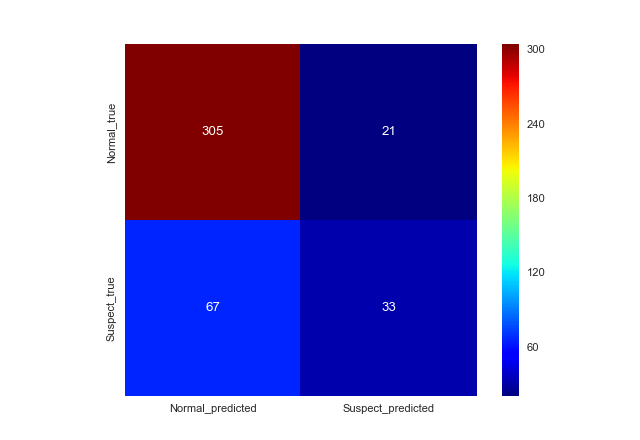

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

cm = confusion_matrix(y_test, y_pred)
labels = ['Normal_predicted', 'Suspect_predicted','Normal_true', 'Suspect_true']

with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cm, square=True, xticklabels=labels, yticklabels=labels, annot=True, cmap=plt.cm.jet, fmt='.00f')    